<a href="https://colab.research.google.com/github/mscharan-analytics/data-ethics-analysis/blob/main/Analysis_of_COMPASS_Data_for_Fairness.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Data Import

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True )

Mounted at /content/gdrive


In [ ]:
data = pd.read_csv('/content/compas-scores-two-years.csv')

In [ ]:
import pandas as pd
data = pd.read_csv('/content/gdrive/MyDrive/A2-BA840 Group Files/Data/compas-scores-two-years.csv')

FileNotFoundError: [Errno 2] No such file or directory: '/content/gdrive/MyDrive/A2-BA840 Group Files/Data/compas-scores-two-years.csv'

## Data Dictionary

| Column                   | Description                                             |
|--------------------------|---------------------------------------------------------|
| id                       | Unique identifier for each person                       |
| name                     | Full name of the person                                 |
| first                    | First name of the person                                |
| last                     | Last name of the person                                 |
| compas_screening_date    | Date when COMPAS screening was conducted                |
| sex                      | Gender of the person (Male/Female)                      |
| dob                      | Date of birth of the person                             |
| age                      | Age of the person in years (continuous)                 |
| age_cat                  | Age category of the person                              |
| race                     | Race of the person                                      |
| juv_fel_count            | Number of juvenile felony charges (continuous)           |
| decile_score             | Decile of the COMPAS score (continuous)                 |
| juv_misd_count           | Number of juvenile misdemeanor charges (continuous)     |
| juv_other_count          | Number of other juvenile charges (continuous)           |
| priors_count             | Number of prior charges (continuous)                    |
| days_b_screening_arrest  | Days between screening and arrest                       |
| c_jail_in                | Date and time of jail intake                            |
| c_jail_out               | Date and time of jail release                           |
| c_case_number            | Case number                                             |
| c_offense_date           | Date of offense                                         |
| c_arrest_date            | Date of arrest                                          |
| c_days_from_compas       | Days from COMPAS screening to case                      |
| c_charge_degree          | Degree of the criminal charge                           |
| c_charge_desc            | Description of the criminal charge                      |
| is_recid                 | Binary indicator if the person has recidivated           |
| r_case_number            | Case number for recidivism                              |
| r_charge_degree          | Degree of the recidivism charge                         |
| r_days_from_arrest       | Days from arrest to recidivism                          |
| r_offense_date           | Date of recidivism offense                              |
| r_charge_desc            | Description of recidivism charge                        |
| r_jail_in                | Date and time of jail intake for recidivism             |
| r_jail_out               | Date and time of jail release for recidivism            |
| violent_recid            | Binary indicator if the recidivism is violent           |
| is_violent_recid         | Binary indicator if the recidivism is violent           |
| vr_case_number           | Case number for violent recidivism                      |
| vr_charge_degree         | Degree of violent recidivism charge                     |
| vr_offense_date          | Date of violent recidivism offense                      |
| vr_charge_desc           | Description of violent recidivism charge                |
| type_of_assessment       | Type of assessment                                      |
| decile_score.1           | Duplicate column for COMPAS score decile                |
| score_text               | Textual description of score                            |
| screening_date           | Date of screening                                       |
| v_type_of_assessment     | Type of assessment for violent recidivism               |
| v_decile_score           | COMPAS score decile for violent recidivism              |
| v_score_text             | Textual description of score for violent recidivism     |
| v_screening_date         | Date of screening for violent recidivism                |
| in_custody               | Date and time in custody                                |
| out_custody              | Date and time out of custody                            |
| priors_count.1           | Duplicate column for number of prior charges            |
| start                    | Start time                                              |
| end                      | End time                                                |
| event                    | Event                                                   |
| two_year_recid           | Binary indicator if there was a two-year recidivism     |


## Exploratory Data Analysis

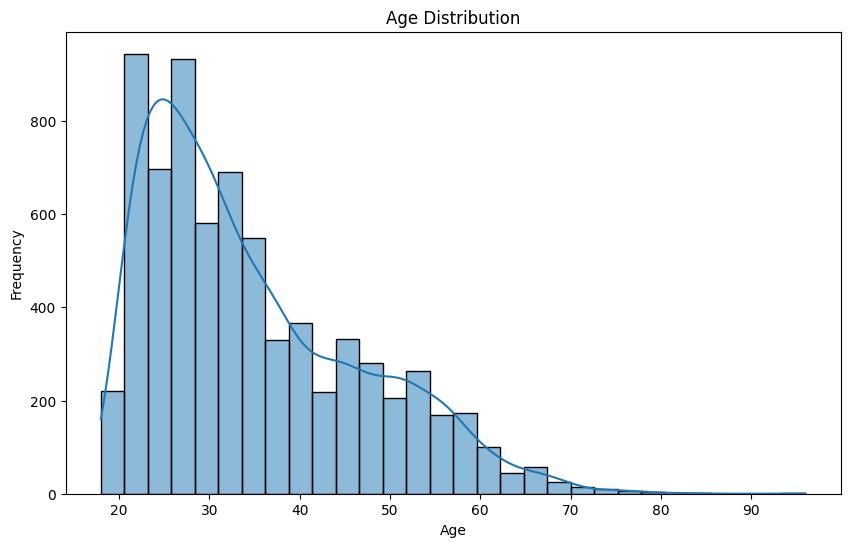

In [ ]:
#Age distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='age', bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

Key Insights Age Distribution:
1. Caucasians make up the largest racial group in the dataset, followed by African-Americans.
2. Hispanics and Asians have significantly lower representation compared to Caucasians and African-Americans.
3. The "Other" and Native American racial categories have the lowest counts overall.


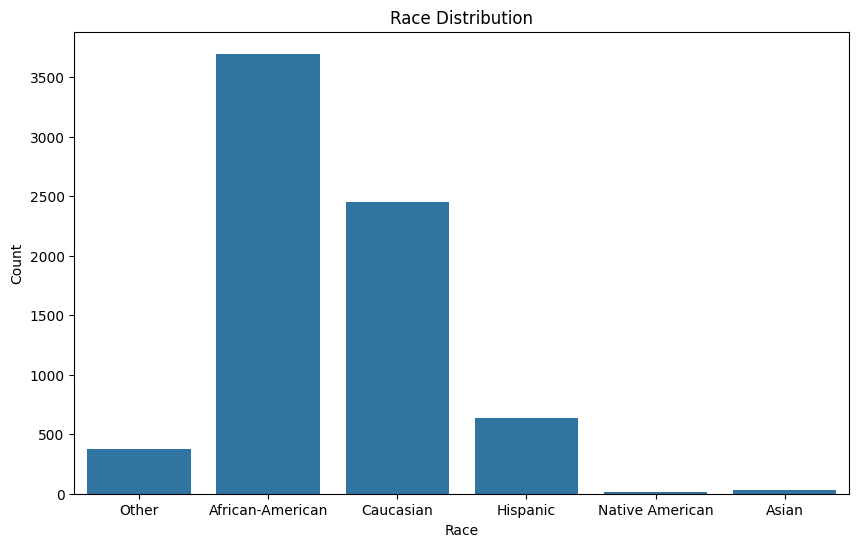

In [ ]:
#race distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='race')
plt.title('Race Distribution')
plt.xlabel('Race')
plt.ylabel('Count')
plt.show()

Key Insights Distribution by Race:
1. The age distribution shows a clear peak in the late 20s to early 30s range, indicating that this is the most common age group in the dataset.
2. The distribution is right-skewed, with a gradual decline in frequency for older age groups.
3. There are very few individuals over the age of 60 in the dataset.


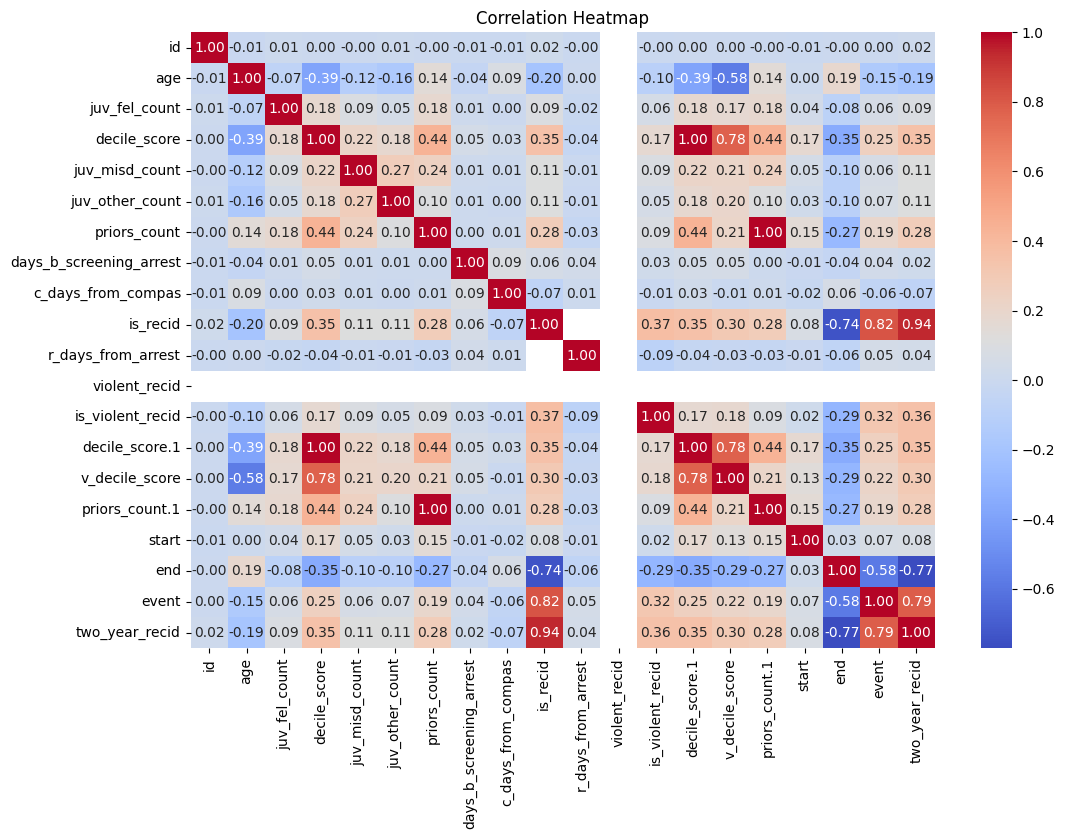

In [ ]:
#Correlation heatmap for numeric variables
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = data[numeric_cols].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

Key Insights from Correlation Map:
1. The strongest positive correlations appear between variables like priors_count, juv_fel_count, and decile_score, suggesting that prior criminal history is associated with higher risk scores.
2. Age has a moderate negative correlation with many variables, indicating that younger individuals may be associated with higher risk factors.
3. The recidivism variables (is_recid and two_year_recid) have relatively weak correlations with most other variables, suggesting that predicting recidivism is a complex task.


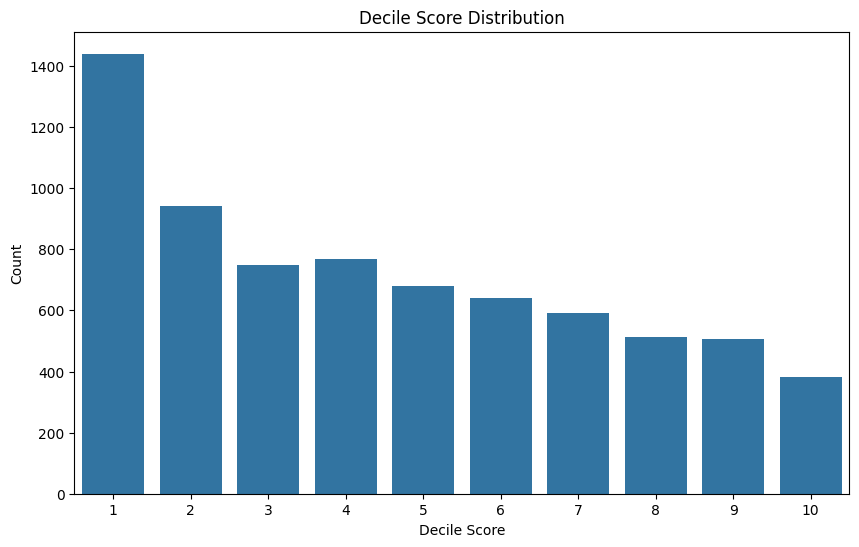

In [ ]:
#Decile score distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='decile_score')
plt.title('Decile Score Distribution')
plt.xlabel('Decile Score')
plt.ylabel('Count')
plt.show()

Key Insights Decile Score Distribution:
1. The majority of individuals have a decile score between 1 and 5, with the highest count at decile score 1.
2. The distribution is right-skewed, with fewer individuals receiving higher decile scores (6-10).
3. There is a steep drop-off in count from decile score 1 to 2, and then a more gradual decline for higher scores.


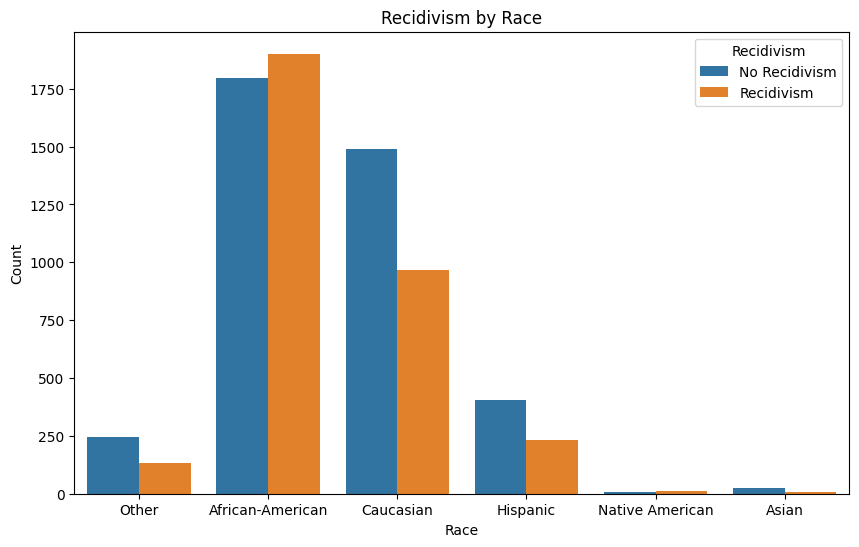

In [ ]:
# Plot recidivism by race
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='race', hue='two_year_recid')
plt.title('Recidivism by Race')
plt.xlabel('Race')
plt.ylabel('Count')
plt.legend(title='Recidivism', labels=['No Recidivism', 'Recidivism'])
plt.show()

Key Insights Recidivism by Race:
1. African-Americans have the highest recidivism rate among all racial groups, followed by Native Americans.
2. Asians have the lowest recidivism rate, significantly lower than all other racial groups.
3. The "Other" racial category has a recidivism rate similar to Caucasians and Hispanics, which fall between African-Americans/Native Americans and Asians.


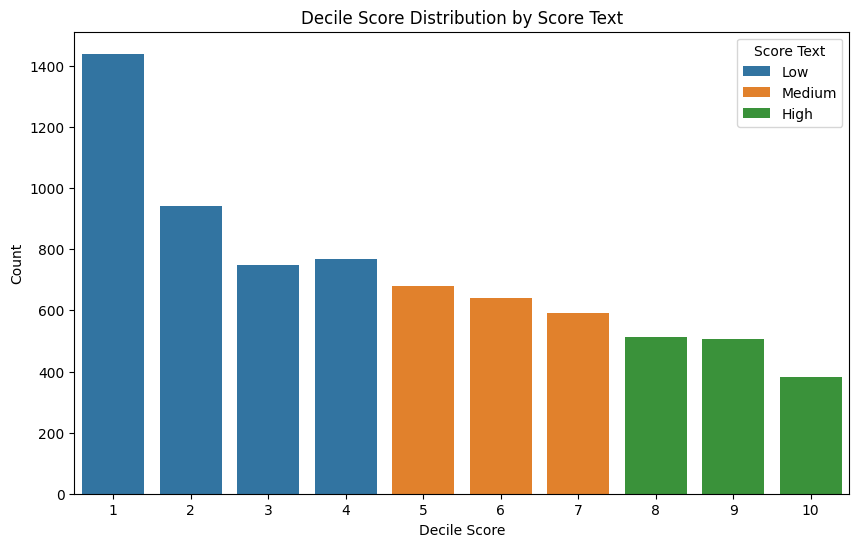

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='decile_score', hue='score_text')
plt.title('Decile Score Distribution by Score Text')
plt.xlabel('Decile Score')
plt.ylabel('Count')
plt.legend(title='Score Text')
plt.show()

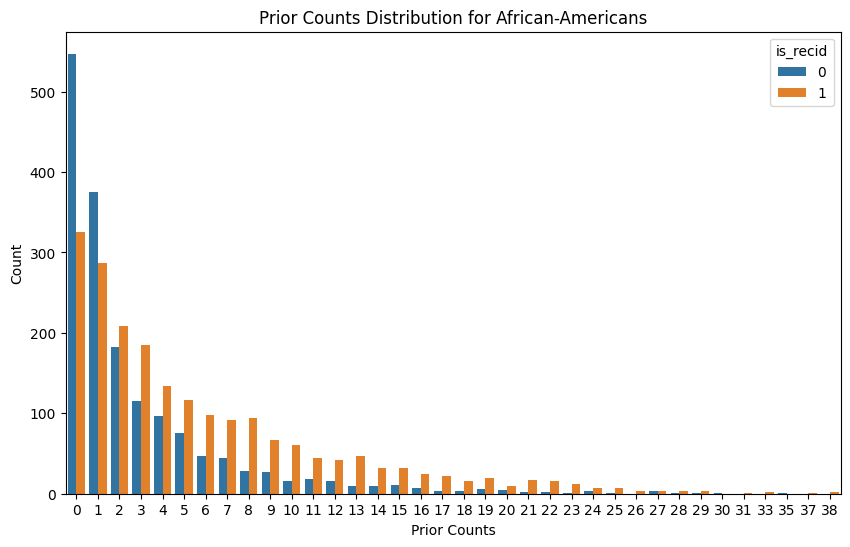

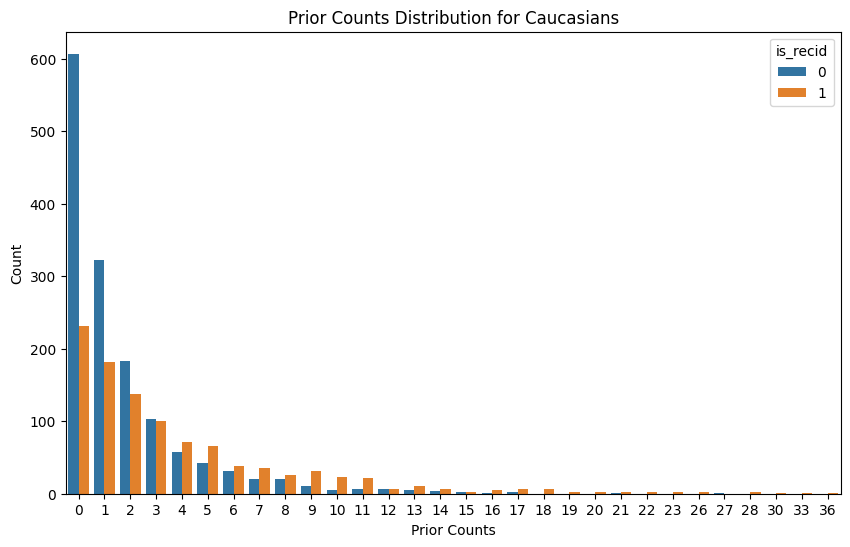

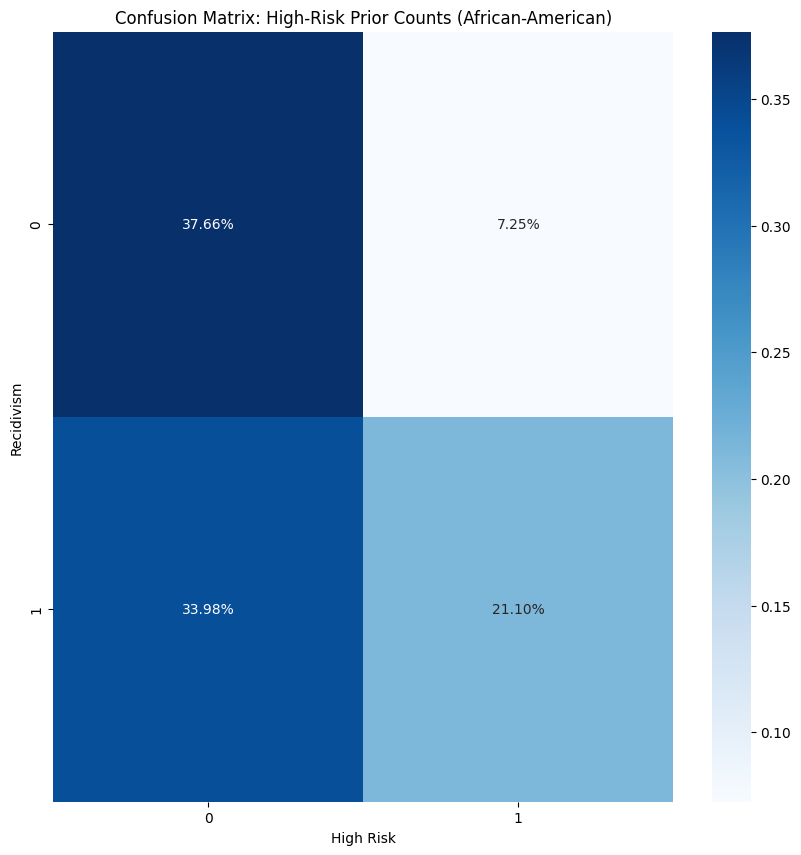

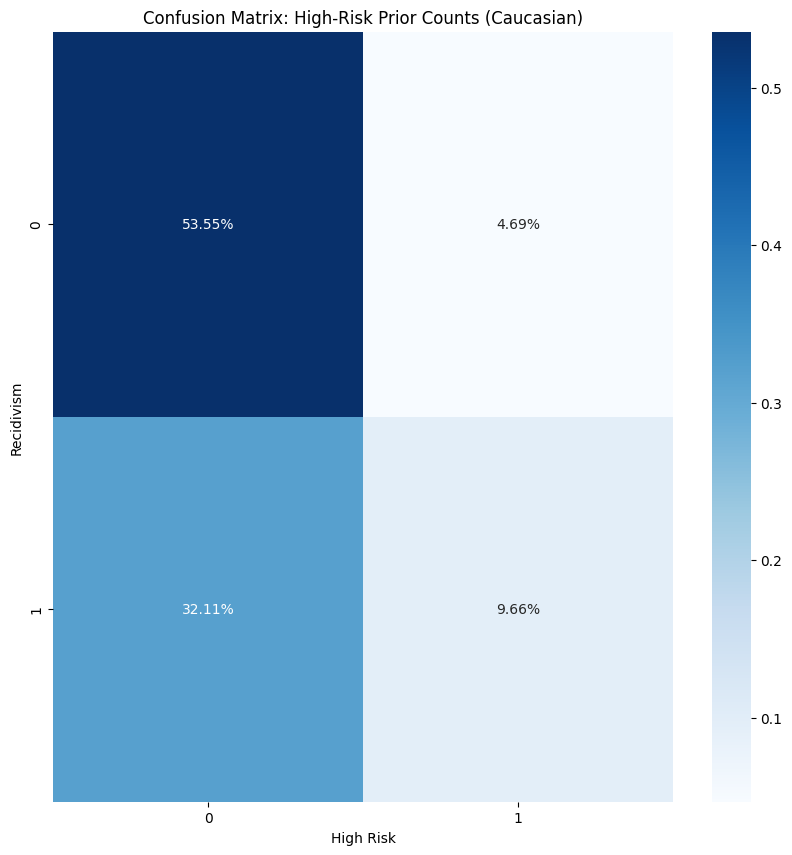

Fairness Evaluation: The difference in high-risk classification between African-Americans and Caucasians is greater than 5%, indicating potential bias.


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

data_afr = data[data['race'] == 'African-American']
data_cau = data[data['race'] == 'Caucasian']


# Plot countplot for prior counts (Caucasian)
plt.figure(figsize=(10, 6))
sns.countplot(x='priors_count', hue='is_recid', data=df_cau)
plt.title('Prior Counts Distribution for Caucasians')
plt.xlabel('Prior Counts')
plt.ylabel('Count')
plt.show()

# Create confusion matrix for prior counts (African-American)
confusion_matrix_prior_afr = pd.crosstab(df_afr['is_recid'], np.where(df_afr['priors_count'] >= 6, 1, 0),
                               rownames=['Recidivism'], colnames=['High_Risk'], normalize=True)

# Plot confusion matrix (African-American)
plt.figure(figsize=(10, 10))
sns.heatmap(confusion_matrix_prior_afr, annot=True, fmt='.2%', cmap='Blues')
plt.title('Confusion Matrix: High-Risk Prior Counts (African-American)')
plt.xlabel('High Risk')
plt.ylabel('Recidivism')
plt.show()

# Create confusion matrix for prior counts (Caucasian)
confusion_matrix_prior_cau = pd.crosstab(df_cau['is_recid'], np.where(df_cau['priors_count'] >= 6, 1, 0),
                               rownames=['Recidivism'], colnames=['High_Risk'], normalize=True)

# Plot confusion matrix (Caucasian)
plt.figure(figsize=(10, 10))
sns.heatmap(confusion_matrix_prior_cau, annot=True, fmt='.2%', cmap='Blues')
plt.title('Confusion Matrix: High-Risk Prior Counts (Caucasian)')
plt.xlabel('High Risk')
plt.ylabel('Recidivism')
plt.show()

# Calculate fairness metrics
prior_high_risk_afr = confusion_matrix_prior_afr.loc[1, 1]  # Proportion of African-Americans classified as high-risk
prior_high_risk_cau = confusion_matrix_prior_cau.loc[1, 1]  # Proportion of Caucasians classified as high-risk
fairness_rule = abs(prior_high_risk_afr - prior_high_risk_cau) <= 0.05  # Fairness rule: Difference in high-risk classification should be less than or equal to 5%

# Print fairness rule evaluation
if fairness_rule:
    print("Fairness Evaluation: The difference in high-risk classification between African-Americans and Caucasians is within 5%, indicating fairness.")
else:
    print("Fairness Evaluation: The difference in high-risk classification between African-Americans and Caucasians is greater than 5%, indicating potential bias.")


In [ ]:
#prior counts (African-American)
plt.figure(figsize=(10, 6))
sns.countplot(x='priors_count', hue='is_recid', data=data_afr)
plt.title('Prior Counts Distribution for African-Americans')
plt.xlabel('Prior Counts')
plt.ylabel('Count')
plt.show()

## Rule 2


**Rule: Assessing Conviction Rates Among Different Race Groups for Recidivism Within Two Years**

To assess whether individuals from diverse racial backgrounds, who experienced recidivism within a two-year period, face equal rates of conviction, we analyze data on recidivism and conviction outcomes across racial demographics. Through comparative analysis and statistical testing, we determine if disparities exist in conviction rates among different racial groups. Accounting for confounding factors is crucial, as it helps contextualize any observed differences. Ultimately, addressing disparities in conviction rates may require systemic reforms and interventions to promote fairness and equity within the criminal justice system.

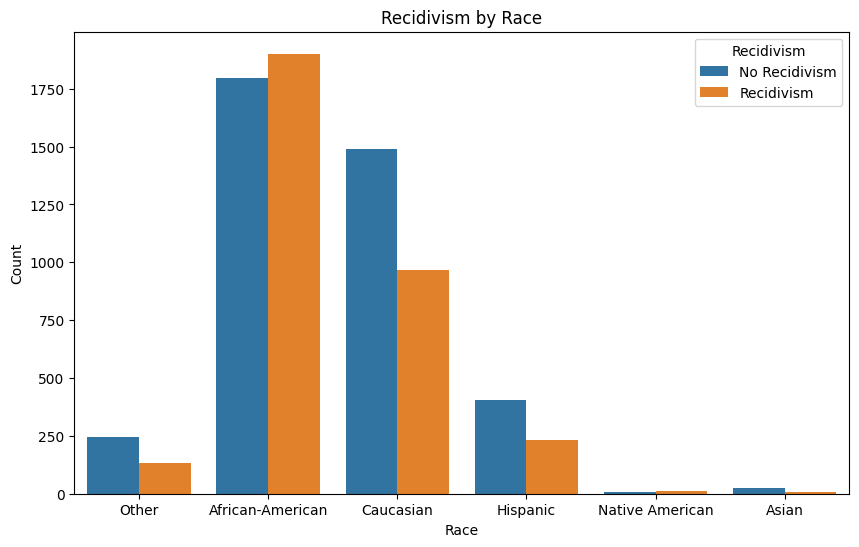

In [ ]:
# Plot recidivism by race
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='race', hue='two_year_recid')
plt.title('Recidivism by Race')
plt.xlabel('Race')
plt.ylabel('Count')
plt.legend(title='Recidivism', labels=['No Recidivism', 'Recidivism'])
plt.show()

Given the elevated prevalence of both non-recidivism and recidivism within a two-year timeframe among African American and Caucasian demographics, it is advisable to focus the analysis on these groups for potential disparities in recidivism rates.

### African American

<Axes: xlabel='two_year_recid', ylabel='count'>

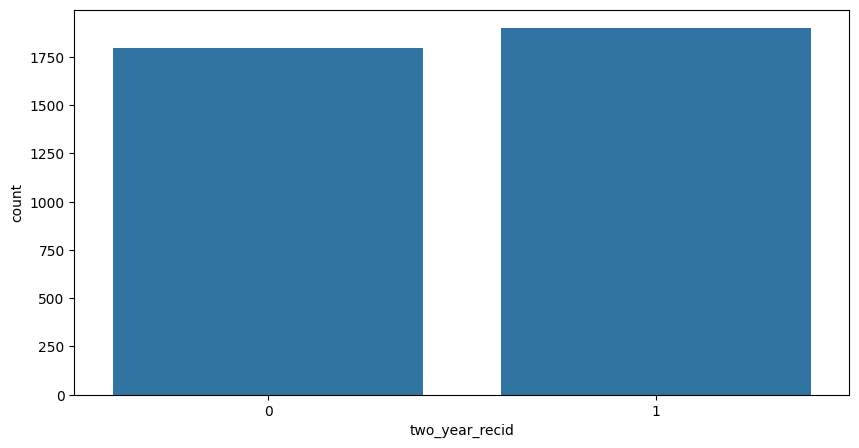

In [ ]:
data_afam = data[data['race'] == 'African-American']
plt.figure(figsize=(10, 5))
sns.countplot(x='two_year_recid', data= data_afam)

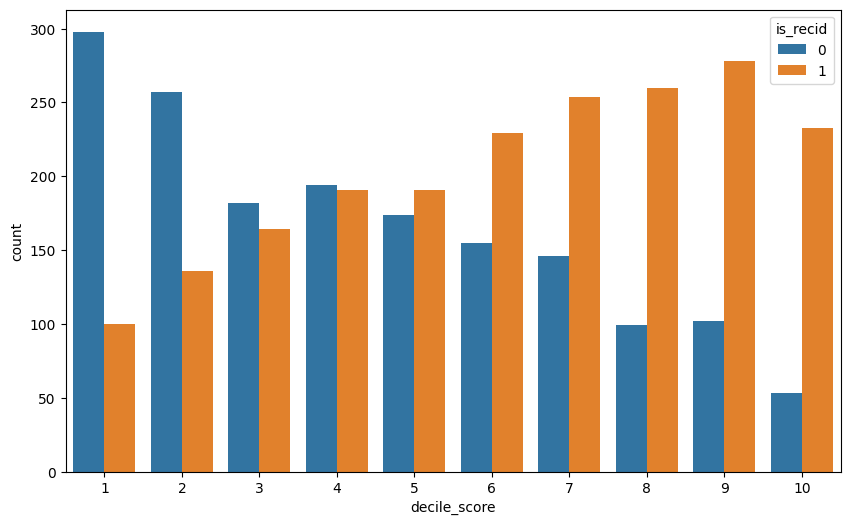

In [ ]:
data_afam = data_afam[data_afam['two_year_recid'].notnull()]
f, ax = plt.subplots(figsize=(10,6))
sns.countplot(x='decile_score',hue = 'is_recid',data = data_afam);

After reviewing the graph, we have chosen to establish the threshold for the decile_score as less than 6. This decision is made due to the observed distribution of data on the graph, which suggests that a decile_score below 6 encompasses a significant portion of the dataset and is indicative of a specific pattern or trend that aligns with our analytical objectives.

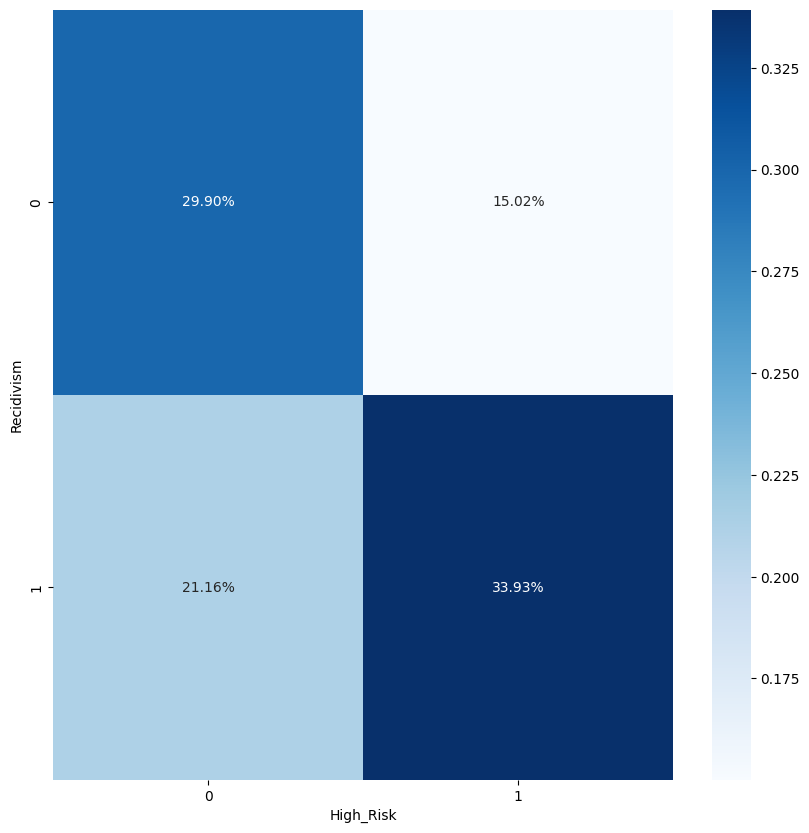

In [ ]:
confusion_matrix_afam = pd.crosstab(data_afam['is_recid'], np.where(data_afam.decile_score < 6, 0, 1),
                               rownames=['Recidivism'], colnames=['High_Risk'], normalize=True)

plt.figure(figsize=(10, 10))
sns.heatmap(confusion_matrix_afam, annot=True, fmt='.2%', cmap='Blues')
plt.show()

Among African AMericans who experienced recidivism within two years, the proportion correctly identified as recidivated (True Positive) was 33.93%, while the proportion correctly identified as not recidivated (True Negative) was 29.90%.

### Caucasian

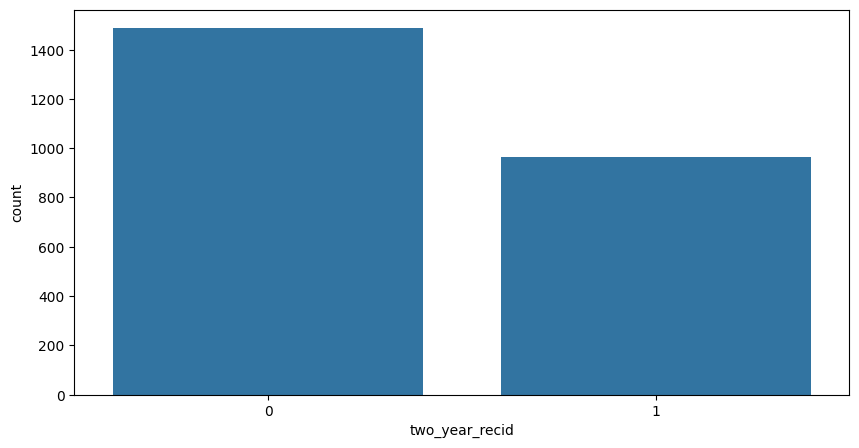

In [ ]:
plt.figure(figsize=(10, 5))
data_cau = data[data['race'] == 'Caucasian']
sns.countplot(x='two_year_recid', data= data_cau);

The bar chart illustrates that within the Caucasian category, there are more instances in which individuals labeled '0' did not recidivate within two years compared to those labeled '1'.

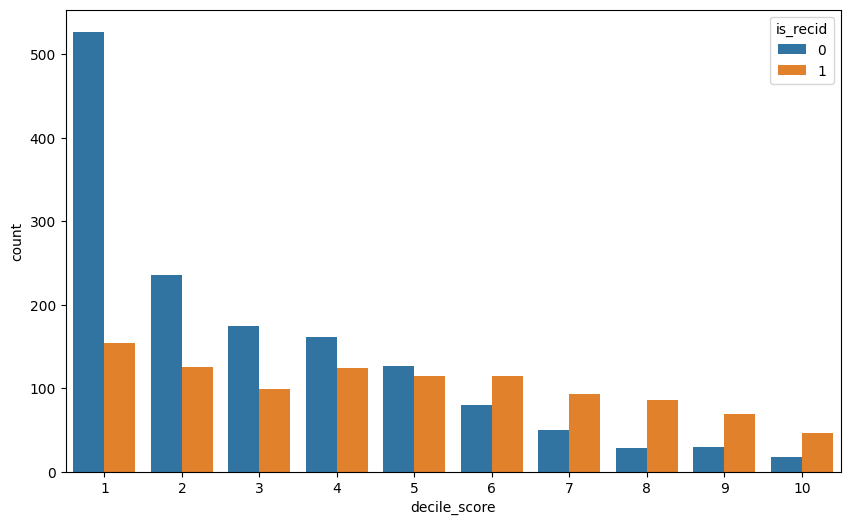

In [ ]:
data_cau = data_cau[data_cau['two_year_recid'].notnull()]
f, ax = plt.subplots(figsize=(10,6))
sns.countplot(x='decile_score',hue = 'is_recid',data = data_cau);

After reviewing the graph, we have chosen to establish the threshold for the decile_score as less than 5. This decision is made due to the observed distribution of data on the graph, which suggests that a decile_score below 5 encompasses a significant portion of the dataset and is indicative of a specific pattern or trend that aligns with our analytical objectives. Furthurmore we did more analysis to come up to this decision.

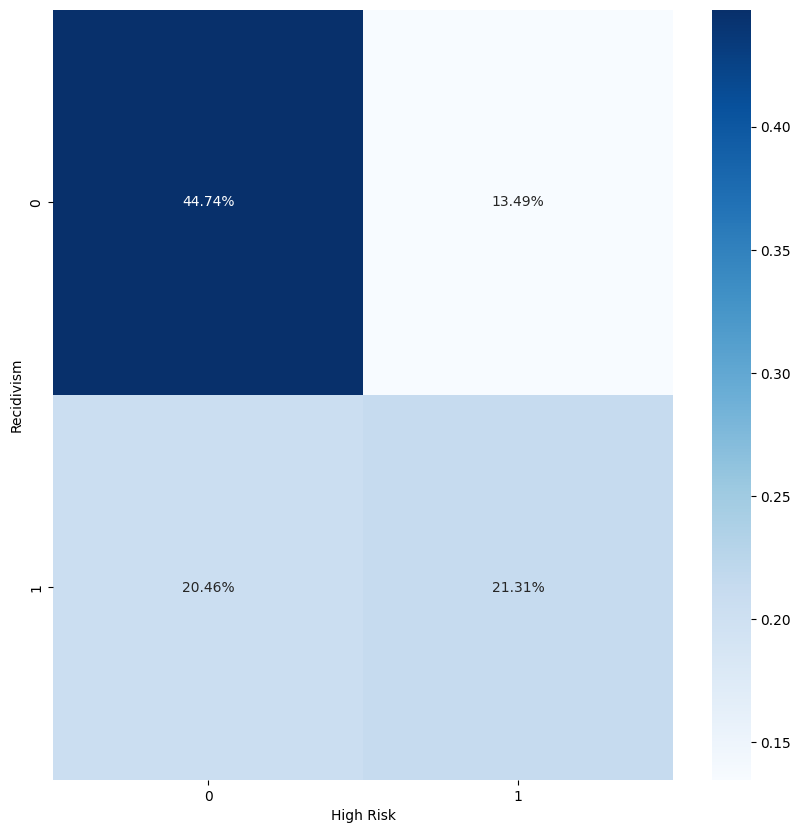

In [ ]:
confusion_matrix_cau = pd.crosstab(data_cau['is_recid'], np.where(data_cau.decile_score < 5, 0, 1),
                               rownames=['Recidivism'], colnames=['High Risk'], normalize=True)

plt.figure(figsize=(10, 10))
sns.heatmap(confusion_matrix_cau, annot=True, fmt='.2%', cmap='Blues')
plt.show()

Among Caucasians who experienced recidivism within two years, the proportion correctly identified as recidivated (True Positive) was 21.31%, while the proportion correctly identified as not recidivated (True Negative) was 44.74%.

### Comparision

In [ ]:
def total_positive_rate(conf_matrix):
    TP = conf_matrix.loc[1, 1]
    FN = conf_matrix.loc[1, 0]
    return TP / (TP + FN) if (TP + FN) != 0 else 0

# Calculate TPR for both groups
tpr_afr = total_positive_rate(confusion_matrix_afam)
tpr_cau = total_positive_rate(confusion_matrix_cau)

print('The TPR for African-American being recidivated within two years and were recidivated:', tpr_afr)
print('The TPR for Caucasian being recidivated within two years and were recidivated:', tpr_cau)

The TPR for African-American being recidivated within two years and were recidivated: 0.6159135559921414
The TPR for Caucasian being recidivated within two years and were recidivated: 0.5102439024390244


For African-Americans, the TPR for being recidivated within two years and were correctly identified as recidivated is 0.6159. This indicates that approximately 61.59% of African-American individuals who truly experienced recidivism within two years were accurately identified by the model as recidivated.

Similarly, for Caucasians, the TPR for being recidivated within two years and were correctly identified as recidivated is 0.5102. This means that approximately 51.02% of Caucasian individuals who actually experienced recidivism within two years were correctly identified by the model as recidivated.

In summary, these TPR values reflect the model's effectiveness in correctly identifying individuals who experienced recidivism within two years within the African-American and Caucasian demographics, respectively.The observed differences in TPR between African-American and Caucasian groups may indicate disparities in the model's performance across racial lines.